In [1]:
import pandas as pd

dataFile = "data2172.csv"
saveFig = True

data = pd.read_csv(dataFile)

for row in range(len(data)):
    data["winningNumbers"][row] = [int(i) for i in data["winningNumbers"][row][1:-1].split(", ")]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [2]:
data

,drawId,winningNumbers,joker,winners,jackpot,distributed,columns
0,1,"[32, 4, 29, 7, 16]",16,1,4311968.28,18916978.16,0
1,2,"[27, 35, 19, 4, 5]",5,0,0.00,39542706.08,0
2,3,"[13, 40, 17, 12, 36]",2,0,39542706.08,29768138.12,0
3,4,"[12, 40, 28, 27, 18]",2,0,26361171.24,16826241.12,0
4,5,"[37, 29, 8, 40, 28]",11,0,237739.40,26639833.16,0
...,...,...,...,...,...,...,...
2167,2168,"[18, 29, 4, 35, 27]",20,0,1232708.62,388164.86,3117790
2168,2169,"[1, 33, 13, 3, 27]",11,0,1620873.48,324315.40,2604943
2169,2170,"[5, 25, 38, 41, 23]",11,0,1945188.88,401055.59,3221330
2170,2171,"[34, 4, 20, 26, 7]",16,0,2346244.46,553039.58,4442085


In [16]:
print("Total number of winners:", data["winners"].sum())

Total number of winners: 602


In [20]:
haveWinner = data["winners"] > 0
print("Total number of draws with at least one winner:", haveWinner.sum())

Total number of draws with at least one winner: 453


In [17]:
print("Total number of columns:", data["columns"].sum())

Total number of columns: 8440881572


In [3]:
print("Average number of winners:", data["winners"].mean())

Average number of winners: 0.27716390423572745


In [4]:
print("Average number of expected winners:", (data[data['columns'] > 0]['columns'] / 24435180).mean())
print("Average number of real winners over the same period:", data[data['columns'] > 0]["winners"].mean())

Average number of expected winners: 0.22636940578842304
Average number of real winners over the same period: 0.24311926605504589


In [5]:
maxId = data['winners'].idxmax()
maxWinners = data.loc[maxId, 'winners']
print("Biggest number of winners:", maxWinners, "at drawId:", data.loc[maxId, 'drawId'])
print()
print(data.loc[maxId])

Biggest number of winners: 10 at drawId: 512

drawId                           512
winningNumbers    [2, 40, 22, 9, 33]
joker                             12
winners                           10
jackpot                  6.88254e+06
distributed              4.07734e+06
columns                            0
Name: 511, dtype: object


In [6]:
# from drawId 210 and then the money are in euros
inEuros = data["drawId"] >= 210
winnings = data["jackpot"] + data["distributed"]
maxId = winnings[inEuros].idxmax()
print("Biggest pool money", winnings[maxId], "euros, at drawId:", data.loc[maxId, 'drawId'], "with",
      data.loc[maxId, 'winners'], "winners")
print()
print(data.loc[maxId])

Biggest pool money 19278990.85 euros, at drawId: 1071 with 3 winners

drawId                            1071
winningNumbers    [22, 42, 36, 39, 17]
joker                               14
winners                              3
jackpot                    1.43494e+07
distributed                4.92957e+06
columns                       49543409
Name: 1070, dtype: object


In [7]:
maxId = winnings[inEuros][haveWinner].idxmax()
print("Biggest winning money", winnings[haveWinner][maxId], "euros, at drawId:", data.loc[maxId, 'drawId'], "with",
      data.loc[maxId, 'winners'], "winners")
print()
print(data.loc[maxId])

Biggest winning money 19278990.85 euros, at drawId: 1071 with 3 winners

drawId                            1071
winningNumbers    [22, 42, 36, 39, 17]
joker                               14
winners                              3
jackpot                    1.43494e+07
distributed                4.92957e+06
columns                       49543409
Name: 1070, dtype: object


In [8]:
notJackpot = data["jackpot"] == 0
print("None jackpot winners:", (data[notJackpot]["winners"] > 0).sum(), "out of", notJackpot.sum())

None jackpot winners: 36 out of 164


In [23]:
# winning lossing spree
maxWinSpree = maxLossSpree = 0
currentWinSpree = currentLossSpree = 0

for res in haveWinner:
    if res:
        # Have winner
        currentWinSpree += 1
        
        # Update loss spree
        maxLossSpree = max(currentLossSpree, maxLossSpree)
        currentLossSpree = 0
    else:
        # Don't have winner
        currentLossSpree += 1
        
        # Update win spree
        maxWinSpree = max(currentWinSpree, maxWinSpree)
        currentWinSpree = 0

print("Biggest winning spree:", maxWinSpree)
print("Biggest loss spree:", maxLossSpree)

Biggest winning spree: 5
Biggest loss spree: 37


In [9]:
from collections import Counter 

numbersFrequency = dict(Counter(i for sub in data["winningNumbers"] for i in set(sub)))
# print(numbersFrequency)

jokerFrequency = dict(Counter(data["joker"]))
# print(jokerFrequency)

winnersFrequency = dict(Counter(data["winners"]))
# print(winnersFrequency)

In [10]:
import matplotlib.pyplot as plt

numbersFrequencyFig = plt.figure()
plt.bar(numbersFrequency.keys(), numbersFrequency.values())
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of the winning numbers')
plt.show()

<Figure size 640x480 with 1 Axes>

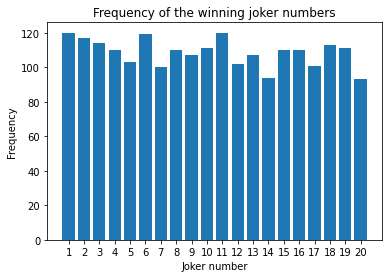

In [11]:
jokerFrequencyFig = plt.figure()
plt.bar(jokerFrequency.keys(), jokerFrequency.values())
plt.xlabel('Joker number')
plt.ylabel('Frequency')
plt.title('Frequency of the winning joker numbers')
plt.xticks(range(1,21))
plt.show()

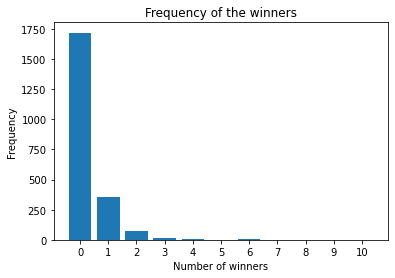

In [12]:
winnersFrequencyFig = plt.figure()
plt.bar(winnersFrequency.keys(), winnersFrequency.values())
plt.xlabel('Number of winners')
plt.ylabel('Frequency')
plt.title('Frequency of the winners')
plt.xticks(range(maxWinners+1))
plt.show()

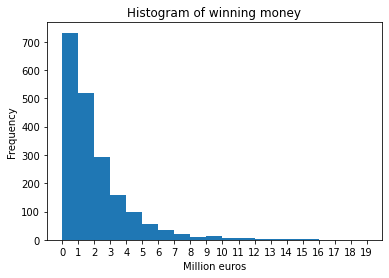

In [13]:
winningsFig = plt.figure()
plt.hist(winnings[inEuros]/1e6, bins=list(range(int((winnings[inEuros]/1e6).max())+1)))
plt.xlabel('Million euros')
plt.ylabel('Frequency')
plt.title('Histogram of winning money')
plt.xticks(range(int((winnings[inEuros]/1e6).max())+1))
plt.show()

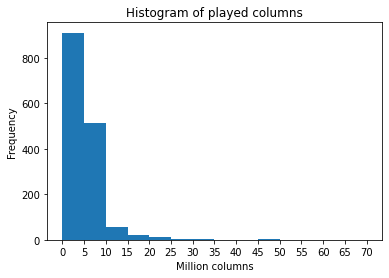

In [14]:
columnsFig = plt.figure()
plt.hist(data[data['columns'] > 0]['columns']/1e6, bins=list(range(0, int((data[data['columns'] > 0]['columns']/1e6).max())+1, 5)))
plt.xlabel('Million columns')
plt.ylabel('Frequency')
plt.title('Histogram of played columns')
plt.xticks(range(0, int((data[data['columns'] > 0]['columns']/1e6).max())+1, 5))
plt.show()

In [15]:
if saveFig:
    numbersFrequencyFig.savefig('images/numbersFrequencyFig.png')
    jokerFrequencyFig.savefig('images/jokerFrequencyFig.png')
    winnersFrequencyFig.savefig('images/winnersFrequencyFig.png')
    winningsFig.savefig('images/winningsFig.png')
    columnsFig.savefig('images/columnsFig.png')